In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from collections import Counter
from ast import literal_eval
import itertools

In [2]:
# reading datasets
bb_usage = pd.read_csv("data/user_profile/BB_Usage_Categorical.csv")
voice_incoming_usage = pd.read_csv("data/user_profile/VOICE_INCOMING_Usage_Categorical.csv")
voice_outgoing_usage = pd.read_csv("data/user_profile/VOICE_OUTGOING_Usage_Categorical.csv")
voice_IDD_incoming_usage = pd.read_csv("data/user_profile/VOICE_IDD_Incoming_Usage_Categorical.csv")
voice_IDD_outgoing_usage = pd.read_csv("data/user_profile/VOICE_IDD_Outgoing_Usage_Categorical.csv")
peo_tv_usage = pd.read_csv("data/user_profile/PEO_TV_Usage_Categorical.csv")

In [3]:
# locations
user_location = pd.read_csv("data/user_profile/User_Locations.csv")
lte_location = pd.read_csv("data/user_profile/User_LTE_Locations.csv")

In [4]:
# user demographics
demo_df = pd.read_csv("data/user_profile/user_demographics.csv")

In [5]:
# VAS
megaline_agg_df = pd.read_csv("data/user_profile/Megaline_Packages.csv")
ftth_agg_df = pd.read_csv("data/user_profile/FTTH_Packages.csv")
lte_agg_df = pd.read_csv("data/user_profile/LTE_Packages.csv")
vas_agg_df = pd.read_csv("data/user_profile/Paid_Vas_Packages.csv")


/Users/chiranhewawitharana/mambaforge/envs/mactf/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [200]:
package_df = pd.read_csv("data/user_profile/Package_Final_list.csv")

/Users/chiranhewawitharana/mambaforge/envs/mactf/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
# Subscription Types
sub_df = pd.read_csv("data/user_profile/User_Subscription_Map.csv")
promo_change_df = pd.read_csv("data/user_profile/User_Subscription_Changes.csv")

In [7]:
#Extra GB Usage BB
extra_GB_df = pd.read_csv("data/user_profile/BB_extra_GB_usage.csv")

In [8]:
# Peo TV Extra Channel Usage
extra_Peo_df = pd.read_csv("data/user_profile/Peo_Extra_Peo_Usage.csv")

In [9]:
# All customers reference
all_users_df = pd.read_csv("data/user_profile/account_no_map_all.csv")
agg_users_df = pd.read_csv("data/user_profile/account_no_map_agg.csv")

In [10]:
# User BB Package Map
user_bb_package_df = pd.read_csv("data/user_profile/User_BB_Package_Map.csv")
user_peo_packages_df = pd.read_csv("data/user_profile/Peo_TV_Users_Packages.csv")

In [11]:
# Payment and billing details
payments_df = pd.read_csv("data/user_profile/User_Payment_Details.csv")
billing_df = pd.read_csv("data/user_profile/User_Billing_Details.csv")

# Data perapration

In [12]:
user_bb_package_df.drop(["Unnamed: 0"],axis=1,inplace=True)
user_bb_package_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32945 entries, 0 to 32944
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ACCOUNT_NUM.hash  32945 non-null  object
 1   BB_Package        32945 non-null  object
dtypes: object(2)
memory usage: 514.9+ KB


In [13]:
user_peo_packages_df.drop(["Unnamed: 0"],axis=1,inplace=True)
user_peo_packages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24262 entries, 0 to 24261
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   event_source.hash  24262 non-null  object
 1   Peo_TV_Package     24262 non-null  object
dtypes: object(2)
memory usage: 379.2+ KB


In [14]:
extra_GB_df.drop(["Unnamed: 0"],axis=1,inplace=True)
extra_Peo_df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [15]:
extra_GB_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196207 entries, 0 to 196206
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   ACCOUNT_NUM.hash  196207 non-null  object
 1   Month_Subscribed  196207 non-null  object
 2   Rental            196207 non-null  int64 
 3   BB_Package        196207 non-null  object
 4   GB_AMOUNT         196207 non-null  int64 
 5   Hour_Subscribed   196207 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 9.0+ MB


In [16]:
extra_Peo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151902 entries, 0 to 151901
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   ACCOUNT_NUM.hash  151902 non-null  object
 1   Month_Subscribed  151902 non-null  object
 2   Rental            151902 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 3.5+ MB


In [17]:
all_users_df.drop(["Unnamed: 0"],axis=1,inplace=True)
all_users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161886 entries, 0 to 161885
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   event_source.hash  161886 non-null  object
 1   ACCOUNT_NUM.hash   161886 non-null  object
 2   CR.hash            161886 non-null  object
dtypes: object(3)
memory usage: 3.7+ MB


In [18]:
bb_usage.rename(columns={'Unnamed: 0':'event_source.hash'}, inplace="True")
bb_usage = bb_usage[['event_source.hash','Usage_Rating_Categorical','Usage_Rating_Scaled']]
#bb_usage.drop_duplicates("event_source.hash", inplace=True)
bb_usage.drop([0,1], axis=0, inplace=True)

In [19]:
voice_incoming_usage = voice_incoming_usage[['event_source.hash','Usage_Rating_Categorical','Usage_Rating_Scaled','Outlier']]

In [20]:
voice_outgoing_usage = voice_outgoing_usage[['event_source.hash','Usage_Rating_Categorical','Usage_Rating_Scaled','Outlier']]

In [21]:
voice_IDD_incoming_usage = voice_IDD_incoming_usage[['event_source.hash','Usage_Rating_Categorical','Usage_Rating_Scaled','Outlier','incoming_country']]
voice_IDD_incoming_usage.rename(columns={"incoming_country":"IDD_incoming_country"}, inplace=True)

In [22]:
voice_IDD_outgoing_usage = voice_IDD_outgoing_usage[['event_source.hash','Usage_Rating_Categorical','Usage_Rating_Scaled','Outlier',"outgoing_country"]]
voice_IDD_outgoing_usage.rename(columns={"outgoing_country":"IDD_outgoing_country"}, inplace=True)

In [23]:
peo_tv_usage = peo_tv_usage[['event_source.hash','Peo_TV_Package','Usage_Rating_Categorical','Usage_Rating_Scaled']]

In [24]:
def clean_lists(col):
    col = list(set(col))
    new_col = []
    for i in col:
        if not isinstance(i, float):
            new_col.append(i)
    if len(new_col) == 0:
        return "NO INFO"
    if len(new_col) == 1:
        return new_col[0]
    else:
        return new_col

In [25]:
user_location.drop(["DISPLAYNAME.hash","Unnamed: 0"],axis=1,inplace=True)
all_users_locations_df = user_location.merge(all_users_df,how="left",on="CR.hash")
all_users_locations_df.drop(["CR.hash"],axis=1,inplace=True)
all_users_locations_df = all_users_locations_df.merge(lte_location[["event_source.hash","Location_Node"]],how="left",on="event_source.hash")
all_users_locations_df.rename(columns={"SERVICE_TYPE":"Package_Type_and_Medium","MODEL":"Model","CIRCUIT_STATUS":"Service_Status"},inplace=True)
all_users_locations_df.drop_duplicates("event_source.hash", inplace=True)
all_users_locations_df  = all_users_locations_df[["ACCOUNT_NUM.hash","Location_Identifier","Location_Node","Package_Type_and_Medium","Model","Service_Status"]]
all_users_locations_df = all_users_locations_df.groupby("ACCOUNT_NUM.hash").agg(list)

In [26]:
for col in all_users_locations_df.columns:
    all_users_locations_df[col] = all_users_locations_df[col].apply(lambda x: clean_lists(x))

In [27]:
demo_df.drop(["Unnamed: 0"], axis=1,inplace=True)

In [28]:
megaline_agg_df.drop(["Unnamed: 0"], axis=1,inplace=True)
ftth_agg_df.drop(["Unnamed: 0"], axis=1,inplace=True)
lte_agg_df.drop(["Unnamed: 0"], axis=1,inplace=True)
vas_agg_df.drop(["Unnamed: 0"], axis=1,inplace=True)


In [201]:
package_df.drop(["Unnamed: 0"], axis=1,inplace=True)

In [29]:
megaline_agg_df.rename(columns={"MEDIUM":"Megaline_Medium"},inplace=True)
ftth_agg_df.rename(columns={"MEDIUM":"FTTH_Medium"},inplace=True)
lte_agg_df.rename(columns={"MEDIUM":"LTE_Medium"},inplace=True)
vas_agg_df.rename(columns={"MEDIUM":"VAS_Medium"},inplace=True)

In [30]:
for col in megaline_agg_df.columns[[1,2,4,5,6]]:
    megaline_agg_df[col] = megaline_agg_df[col].apply(lambda x: clean_lists(literal_eval(x)))

In [31]:
for col in ftth_agg_df.columns[[1,2,4,5,6]]:
    ftth_agg_df[col] = ftth_agg_df[col].apply(lambda x: clean_lists(literal_eval(x)))

In [32]:
for col in lte_agg_df.columns[[1,2,4,5,6]]:
    lte_agg_df[col] = lte_agg_df[col].apply(lambda x: clean_lists(literal_eval(x)))

In [33]:
for col in vas_agg_df.columns[[1,2,4,5,6]]:
    vas_agg_df[col] = vas_agg_df[col].apply(lambda x: clean_lists(literal_eval(x)))

In [34]:
def resshape_scales(col):
    tot = 0
    if not isinstance(col,float):
        for i in literal_eval(col):
            try:
                tot = tot+int(i)
            except:
                pass
    return tot

In [35]:
megaline_agg_df["Megaline_Rental"] = megaline_agg_df["Megaline_Rental"].apply(lambda x: resshape_scales(x))
ftth_agg_df["FTTH_Rental"] = ftth_agg_df["FTTH_Rental"].apply(lambda x: resshape_scales(x))
lte_agg_df["LTE_Rental"] = lte_agg_df["LTE_Rental"].apply(lambda x: resshape_scales(x))
vas_agg_df["Rental"] = vas_agg_df["Rental"].apply(lambda x: resshape_scales(x))

In [36]:
scaler = MinMaxScaler()
megaline_agg_df['Megaline_Rental_Scaled'] = scaler.fit_transform(megaline_agg_df['Megaline_Rental'].values.reshape(-1,1))
ftth_agg_df['FTTH_Rental_Scaled'] = scaler.fit_transform(ftth_agg_df['FTTH_Rental'].values.reshape(-1,1))
lte_agg_df['LTE_Rental_Scaled'] = scaler.fit_transform(lte_agg_df['LTE_Rental'].values.reshape(-1,1))

In [37]:
agg_users_df.drop(["Unnamed: 0"], axis=1,inplace=True)
sub_df.drop(["Unnamed: 0"], axis=1,inplace=True)
promo_change_df.drop(["Unnamed: 0"], axis=1,inplace=True)

In [38]:
payments_df.drop(["Unnamed: 0"], axis=1,inplace=True)
billing_df.drop(["Unnamed: 0"], axis=1,inplace=True)

#### Merging BB Packages

In [39]:
user_bb_package_df = user_bb_package_df.groupby("ACCOUNT_NUM.hash").agg(list)
for col in user_bb_package_df.columns:
    user_bb_package_df[col] = user_bb_package_df[col].apply(lambda x: clean_lists(x))

## Mapping Acc No to Usage DFs

In [40]:
peo_tv_usage = peo_tv_usage.merge(all_users_df, how="left",on="event_source.hash")
peo_tv_usage = peo_tv_usage[peo_tv_usage['event_source.hash'].notna()]
peo_tv_usage.drop(["CR.hash"],axis=1,inplace=True)

In [41]:
voice_IDD_outgoing_usage = voice_IDD_outgoing_usage.merge(all_users_df, how="left",on="event_source.hash")
voice_IDD_outgoing_usage = voice_IDD_outgoing_usage[voice_IDD_outgoing_usage['event_source.hash'].notna()]
voice_IDD_outgoing_usage.drop(["CR.hash"],axis=1,inplace=True)

In [42]:
voice_IDD_incoming_usage = voice_IDD_incoming_usage.merge(all_users_df, how="left",on="event_source.hash")
voice_IDD_incoming_usage = voice_IDD_incoming_usage[voice_IDD_incoming_usage['event_source.hash'].notna()]
voice_IDD_incoming_usage.drop(["CR.hash"],axis=1,inplace=True)

In [43]:
voice_outgoing_usage = voice_outgoing_usage.merge(all_users_df, how="left",on="event_source.hash")
voice_outgoing_usage = voice_outgoing_usage[voice_outgoing_usage['event_source.hash'].notna()]
voice_outgoing_usage.drop(["CR.hash"],axis=1,inplace=True)

In [44]:
voice_incoming_usage = voice_incoming_usage.merge(all_users_df, how="left",on="event_source.hash")
voice_incoming_usage = voice_incoming_usage[voice_incoming_usage['event_source.hash'].notna()]
voice_incoming_usage.drop(["CR.hash"],axis=1,inplace=True)
voice_incoming_usage = voice_incoming_usage[["event_source.hash","ACCOUNT_NUM.hash","Usage_Rating_Categorical","Usage_Rating_Scaled","Outlier"]]

In [45]:
bb_usage = bb_usage.merge(all_users_df, how="left",on="event_source.hash")
bb_usage = bb_usage[bb_usage['event_source.hash'].notna()]
bb_usage.drop(["CR.hash"],axis=1,inplace=True)
bb_usage = bb_usage.merge(user_bb_package_df, how = "left", on="ACCOUNT_NUM.hash")
bb_usage.drop_duplicates("event_source.hash", keep="last", inplace=True)

In [46]:
# user location 
print(bb_usage.shape)
print(voice_incoming_usage.shape)
print(voice_outgoing_usage.shape)
print(all_users_locations_df.shape) # merging begins with this
print(voice_IDD_outgoing_usage.shape)
print(voice_IDD_incoming_usage.shape)
print(peo_tv_usage.shape)

(67720, 5)
(59546, 5)
(59170, 5)
(44441, 5)
(6141, 6)
(12577, 6)
(23796, 5)


In [57]:
bb_usage.drop(["ACCOUNT_NUM.hash"],axis=1, inplace=True)
voice_incoming_usage.drop(["ACCOUNT_NUM.hash"],axis=1, inplace=True)
voice_outgoing_usage.drop(["ACCOUNT_NUM.hash"],axis=1, inplace=True)
voice_IDD_outgoing_usage.drop(["ACCOUNT_NUM.hash"],axis=1, inplace=True)
voice_IDD_incoming_usage.drop(["ACCOUNT_NUM.hash"],axis=1, inplace=True)
peo_tv_usage.drop(["ACCOUNT_NUM.hash"],axis=1, inplace=True)

In [47]:
demo_df.drop(["CR.hash"],axis=1, inplace=True)

# User Profile : Usage

In [84]:
usage_df = all_users_df.merge(voice_incoming_usage,how='left', on='event_source.hash')
usage_df = usage_df.merge(all_users_locations_df,how='left', on='ACCOUNT_NUM.hash')
usage_df.rename(columns={'Usage_Rating_Categorical':'Voice_INCOMING_Categorical',
                         'Usage_Rating_Scaled':'Voice_INCOMING_Scaled','Outlier':'Voice_INCOMING_Outlier'}, inplace="True")
usage_df.drop_duplicates("event_source.hash",inplace=True)

In [85]:
usage_df = usage_df.merge(voice_outgoing_usage,how='left', on='event_source.hash')
usage_df.rename(columns={'Usage_Rating_Categorical':'Voice_OUTGOING_Categorical','Usage_Rating_Scaled':'Voice_OUTGOING_Scaled','Outlier':'Voice_OUTGOING_Outlier'}, inplace="True")
usage_df.drop_duplicates("event_source.hash",inplace=True)

In [86]:
usage_df = usage_df.merge(voice_IDD_incoming_usage,how='left', on='event_source.hash')
usage_df.rename(columns={'Usage_Rating_Categorical':'IDD_INCOMING_Categorical','Usage_Rating_Scaled':'IDD_INCOMING_Scaled','Outlier':'IDD_INCOMING_Outlier'}, inplace="True")
usage_df.drop_duplicates("event_source.hash",inplace=True)

In [87]:
usage_df = usage_df.merge(voice_IDD_outgoing_usage,how='left', on='event_source.hash')
usage_df.rename(columns={'Usage_Rating_Categorical':'IDD_OUTGOING_Categorical','Usage_Rating_Scaled':'IDD_OUTGOING_Scaled','Outlier':'IDD_OUTGOING_Outlier'}, inplace="True")
usage_df.drop_duplicates("event_source.hash",inplace=True)

In [88]:
usage_df = usage_df.merge(peo_tv_usage,how='left', on='event_source.hash')
usage_df.rename(columns={'Usage_Rating_Categorical':'PEO_TV_Categorical','Usage_Rating_Scaled':'PEO_TV_Scaled'}, inplace="True")
usage_df.drop_duplicates("event_source.hash",inplace=True)

In [89]:
# merege BB usage
usage_df = usage_df.merge(bb_usage,how='left', on='event_source.hash')
usage_df.rename(columns={'Usage_Rating_Categorical':'BB_Categorical','Usage_Rating_Scaled':'BB_Scaled'}, inplace="True")
usage_df.drop_duplicates("event_source.hash",inplace=True)

# Adding New Data

### Adding demographics

In [91]:
usage_df = usage_df.merge(demo_df.drop("ACCOUNT_NUM.hash",axis=1),how='left', on='event_source.hash')

In [92]:
usage_df[["BIRTH_YEAR","AGE"]].describe()

,BIRTH_YEAR,AGE
count,76515.000000,76515.000000
mean,1966.834777,54.165223
std,14.940487,14.940487
min,1922.000000,17.000000
25%,1956.000000,43.000000
50%,1967.000000,54.000000
75%,1978.000000,65.000000
max,2004.000000,99.000000


<AxesSubplot:ylabel='Density'>

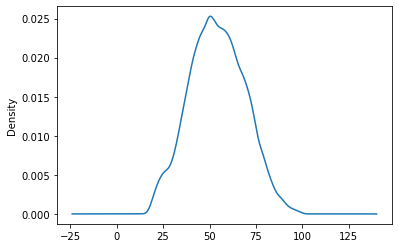

In [93]:
usage_df["AGE"].plot(kind = 'density')

<AxesSubplot:ylabel='Density'>

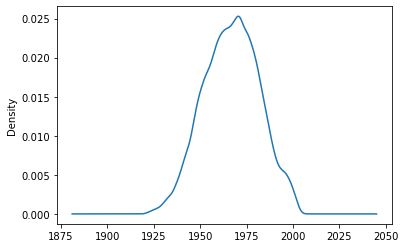

In [94]:
usage_df["BIRTH_YEAR"].plot(kind = 'density')

## Voice Usage Bins

In [95]:
usage_df["Voice_INCOMING_Categorical"].value_counts()

LOW       35720
MEDIUM     8703
HIGH        322
Name: Voice_INCOMING_Categorical, dtype: int64

In [96]:
def voice_bin(incoming,outgoing):
    if incoming=="LOW" and outgoing=="LOW":
        return "LOW"
    if incoming=="HIGH" and outgoing=="HIGH":
        return "HIGH"
    if (incoming=="HIGH" and outgoing=="MEDIUM") or (incoming=="MEDIUM" and outgoing=="HIGH"):
        return "HIGH"
    if incoming=="MEDIUM" and outgoing=="MEDIUM":
        return "MEDIUM"
    if (incoming=="MEDIUM" and outgoing=="LOW") or (incoming=="LOW" and outgoing=="MEDIUM"):
        return "LOW"
    if (incoming=="LOW" and outgoing=="HIGH") or (incoming=="HIGH" and outgoing=="LOW"):
        return "MEDIUM"
    if (isinstance(incoming,float) and not isinstance(outgoing,float)) or (not isinstance(incoming,float) and isinstance(outgoing,float)):
        return "LOW"
#     if (isinstance(incoming,float) and isinstance(outgoing,float)):
#         return "NO"

In [97]:
# test
voice_bin("LOW","HIGH")

'MEDIUM'

In [98]:
usage_df["Voice_Overall_Categorical"] = usage_df.apply(lambda x: voice_bin(x["Voice_INCOMING_Categorical"], x["Voice_OUTGOING_Categorical"]), axis=1)

In [99]:
usage_df["IDD_Overall_Categorical"] = usage_df.apply(lambda x: voice_bin(x["IDD_INCOMING_Categorical"], x["IDD_OUTGOING_Categorical"]), axis=1)

In [100]:
def voice_overall_bin(call_usage):
    counts = Counter(call_usage)
    if counts["LOW"] > 1:
        return "LOW"
    elif counts["HIGH"] > 1:
        return "HIGH"
    elif counts["MEDIUM"] > 1:
        return "MEDIUM"
    elif counts["LOW"] == 1 and counts["MEDIUM"] == 1 and counts["HIGH"] == 1:
        return "MEDIUM"
    elif counts["LOW"] == 1 and counts["MEDIUM"] == 1:
        return "LOW"
    elif counts["MEDIUM"] == 1 and counts["HIGH"] == 1:
        return "MEDIUM"

In [101]:
# test
voice_overall_bin(["HIGH","HIGH","NO"])

'HIGH'

In [102]:
usage_df["VOICE_Categorical"] = usage_df.apply(lambda x: voice_overall_bin([ x["Voice_Overall_Categorical"], x["IDD_Overall_Categorical"]]), axis=1)

In [103]:
usage_df[(usage_df["VOICE_Categorical"] == "NO")]

,event_source.hash,ACCOUNT_NUM.hash,CR.hash,Voice_INCOMING_Categorical,Voice_INCOMING_Scaled,Voice_INCOMING_Outlier,Location_Identifier,Location_Node,Package_Type_and_Medium,Model,...,PEO_TV_Scaled,BB_Categorical,BB_Scaled,BB_Package,GENDER,BIRTH_YEAR,AGE,Voice_Overall_Categorical,IDD_Overall_Categorical,VOICE_Categorical


## Subscrition Types

In [104]:
usage_df = usage_df.merge(sub_df,how='left',on=["ACCOUNT_NUM.hash"])

In [105]:
def check_product_level(voice,bb,tv):
    if not isinstance(voice,float): 
        if isinstance(bb,float) and isinstance(tv,float):
            return "SINGLE_PLAY"
        if not isinstance(bb,float) and isinstance(tv,float):
            return "DOUBLE_PLAY_BV"
        if isinstance(bb,float) and not isinstance(tv,float):
            return "DOUBLE_PLAY_PV"
        if not isinstance(bb,float) and not isinstance(tv,float):
            return "TRIPLE_PLAY"

In [106]:
usage_df["Play_Type"] = usage_df.apply(lambda x: check_product_level(x["VOICE_Categorical"], x["BB_Categorical"], x["PEO_TV_Categorical"]), axis=1)

In [107]:
usage_df["Play_Type"].value_counts()

SINGLE_PLAY       118798
DOUBLE_PLAY_BV     21986
TRIPLE_PLAY        16183
DOUBLE_PLAY_PV      4919
Name: Play_Type, dtype: int64

In [108]:
# play usage
def play_usage(usage):
    if len(usage)>2:
        new_usage=[]
        for el in usage:
            if isinstance(el,float) or el=="nan" or el==None:
                new_usage.append("NO_INFO")
            else:
                new_usage.append(el)
        return [f"VOICE_{new_usage[0]}", f"BB_{new_usage[1]}", f"TV_{new_usage[2]}"]
    else:
        return "ERR"

In [109]:
# test
play_usage(["LOW","HIGH","LOW"])

['VOICE_LOW', 'BB_HIGH', 'TV_LOW']

In [110]:
usage_df["Sub_Usage"] = usage_df.apply(lambda x: play_usage([x["VOICE_Categorical"], x["BB_Categorical"], x["PEO_TV_Categorical"]]), axis=1)

In [111]:
usage_df[["Sub_Type","Play_Type"]].value_counts()

Sub_Type        Play_Type     
TRIPLE_PLAY     SINGLE_PLAY       9415
SINGLE_PLAY     SINGLE_PLAY       5726
DOUBLE_PLAY_BV  SINGLE_PLAY       4917
TRIPLE_PLAY     TRIPLE_PLAY       3933
DOUBLE_PLAY_PV  SINGLE_PLAY       2935
DOUBLE_PLAY_BV  DOUBLE_PLAY_BV    2878
DOUBLE_PLAY_PV  DOUBLE_PLAY_PV    1061
                TRIPLE_PLAY        948
TRIPLE_PLAY     DOUBLE_PLAY_PV     893
SINGLE_PLAY     DOUBLE_PLAY_BV     797
4G              SINGLE_PLAY        440
TRIPLE_PLAY     DOUBLE_PLAY_BV     409
DOUBLE_PLAY_BV  TRIPLE_PLAY        125
4G              DOUBLE_PLAY_BV     106
SINGLE_PLAY     TRIPLE_PLAY         79
DOUBLE_PLAY_PV  DOUBLE_PLAY_BV      73
SINGLE_PLAY     DOUBLE_PLAY_PV      37
DOUBLE_PLAY_BV  DOUBLE_PLAY_PV      27
dtype: int64

In [112]:
def check_sub_type(sub):
    if isinstance(sub, float):
        return "Assumed"
    else:
        return "Actual"

In [113]:
usage_df["Sub_Type_State"]=usage_df["Sub_Type"].apply(lambda x: check_sub_type(x))

In [114]:
def merge_sub_types(sub1,sub2):
    if isinstance(sub1, float):
        return sub2
    else:
        return sub1

In [115]:
usage_df["Sub_Type"] = usage_df.apply(lambda x: merge_sub_types(x["Sub_Type"], x["Play_Type"]), axis=1)

In [116]:
usage_df.drop(["Play_Type"],axis=1,inplace=True)

In [117]:
usage_df["Sub_Type_State"].value_counts()

Assumed    127087
Actual      34799
Name: Sub_Type_State, dtype: int64

In [118]:
usage_df["Sub_Type"].value_counts()

SINGLE_PLAY       102004
TRIPLE_PLAY        25748
DOUBLE_PLAY_BV     25670
DOUBLE_PLAY_PV      7918
4G                   546
Name: Sub_Type, dtype: int64

### Note

- Actual Subscription information - for **14412** Subscribers
- Assumed on usage - **30187**

### Wait! Contradiction??

In [119]:
usage_df[(usage_df["Sub_Type"] == "DOUBLE_PLAY_PV")]["BB_Categorical"].value_counts()

LOW       709
MEDIUM    249
HIGH       63
Name: BB_Categorical, dtype: int64

In [120]:
usage_df[(usage_df["Sub_Type"] == "SINGLE_PLAY")]["BB_Categorical"].value_counts()

LOW       658
MEDIUM    144
HIGH       74
Name: BB_Categorical, dtype: int64

In [121]:
usage_df[(usage_df["Sub_Type"] == "SINGLE_PLAY")]["PEO_TV_Categorical"].value_counts()

LOW       57
MEDIUM    41
HIGH      18
Name: PEO_TV_Categorical, dtype: int64

In [122]:
usage_df[(usage_df["Sub_Type"] == "DOUBLE_PLAY_BV")]["PEO_TV_Categorical"].value_counts()

MEDIUM    64
LOW       59
HIGH      29
Name: PEO_TV_Categorical, dtype: int64

### Why??
- These subscribers may have used the services within 2019-01 to 2021-01 and however downgraded thier services by the time of BSS dataset has generated

### Dropping contradictory subscribers

In [123]:
usage_df = usage_df.drop(usage_df[(usage_df["Sub_Type"] == "DOUBLE_PLAY_PV") & (usage_df["BB_Categorical"].notna())].index)

In [124]:
usage_df[(usage_df["Sub_Type"] == "DOUBLE_PLAY_PV")]["BB_Categorical"].value_counts()

Series([], Name: BB_Categorical, dtype: int64)

In [125]:
usage_df = usage_df.drop(usage_df[(usage_df["Sub_Type"] == "SINGLE_PLAY") & (usage_df["BB_Categorical"].notna())].index)

In [126]:
usage_df[(usage_df["Sub_Type"] == "SINGLE_PLAY")]["BB_Categorical"].value_counts()

Series([], Name: BB_Categorical, dtype: int64)

In [127]:
usage_df = usage_df.drop(usage_df[(usage_df["Sub_Type"] == "SINGLE_PLAY") & (usage_df["PEO_TV_Categorical"] != "NO") & (usage_df["PEO_TV_Categorical"].notna())].index)

In [128]:
usage_df[(usage_df["Sub_Type"] == "SINGLE_PLAY")]["PEO_TV_Categorical"].value_counts()

Series([], Name: PEO_TV_Categorical, dtype: int64)

In [129]:
usage_df = usage_df.drop(usage_df[(usage_df["Sub_Type"] == "DOUBLE_PLAY_BV") & (usage_df["PEO_TV_Categorical"] != "NO") & (usage_df["PEO_TV_Categorical"].notna())].index)

In [130]:
usage_df[(usage_df["Sub_Type"] == "DOUBLE_PLAY_BV")]["PEO_TV_Categorical"].value_counts()

Series([], Name: PEO_TV_Categorical, dtype: int64)

In [131]:
usage_df["Sub_Type"].value_counts()

SINGLE_PLAY       101091
TRIPLE_PLAY        25748
DOUBLE_PLAY_BV     25518
DOUBLE_PLAY_PV      6897
4G                   546
Name: Sub_Type, dtype: int64

<AxesSubplot:ylabel='Sub_Type'>

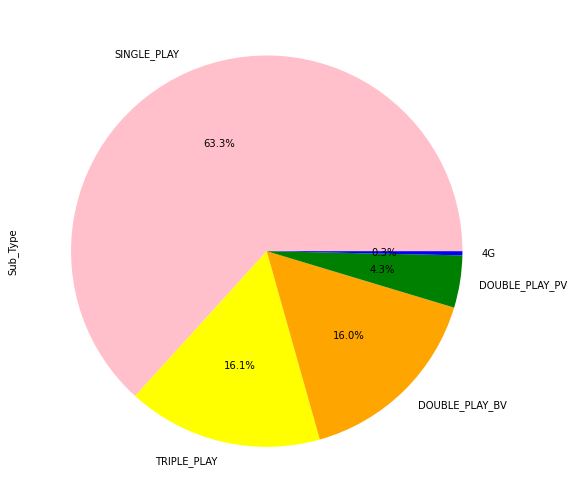

In [132]:
usage_df["Sub_Type"].value_counts().plot(kind='pie', figsize=(9,9), autopct='%1.1f%%', colors=['pink','yellow','orange','green','blue'])

## Service Packages and VAS
- categories derived from "Product State Changes" and "VAS" datasets

In [135]:
usage_df = usage_df.merge(megaline_agg_df,how='left', on='ACCOUNT_NUM.hash')

In [136]:
usage_df = usage_df.merge(ftth_agg_df,how='left', on='ACCOUNT_NUM.hash')

In [137]:
usage_df.Package_Type_x.fillna(usage_df.Package_Type_y,inplace=True)
usage_df.is_Promotion_x.fillna(usage_df.is_Promotion_y,inplace=True)
usage_df.drop(["Package_Type_y","is_Promotion_y"],axis=1, inplace=True)
usage_df.rename(columns={"Package_Type_x":"Package_Type","is_Promotion_x":"is_Promotion"},inplace=True)

In [138]:
usage_df = usage_df.merge(lte_agg_df,how='left', on='ACCOUNT_NUM.hash')

In [139]:
usage_df.Package_Type_x.fillna(usage_df.Package_Type_y,inplace=True)
usage_df.is_Promotion_x.fillna(usage_df.is_Promotion_y,inplace=True)
usage_df.drop(["Package_Type_y","is_Promotion_y"],axis=1, inplace=True)
usage_df.rename(columns={"Package_Type_x":"Package_Type","is_Promotion_x":"is_Promotion"},inplace=True)

In [140]:
vas_agg_df.rename(columns={"Package":"VAS_Package","Month_Subscribed":"VAS_Month_Subscribed","Rental":"VAS_Rental"},inplace=True)

In [141]:
# scaling usage rating
scaler = MinMaxScaler()
vas_agg_df['VAS_Rental_Scaled'] = scaler.fit_transform(vas_agg_df['VAS_Rental'].values.reshape(-1,1))

In [143]:
usage_df = usage_df.merge(vas_agg_df,how='left', on='ACCOUNT_NUM.hash')

In [144]:
usage_df.Package_Type_x.fillna(usage_df.Package_Type_y,inplace=True)

In [145]:
usage_df.drop(["Package_Type_y"],axis=1, inplace=True)
usage_df.rename(columns={"Package_Type_x":"Package_Type"},inplace=True)

## Subscription upgrades and Downgrades

In [146]:
promo_change_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20804 entries, 0 to 20803
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ACCOUNT_NUM.hash   20804 non-null  object
 1   Sub_Update_Date    20799 non-null  object
 2   Sub_Update_Status  20804 non-null  object
 3   Sub_Update         20804 non-null  object
dtypes: object(4)
memory usage: 650.2+ KB


In [147]:
usage_df = usage_df.merge(promo_change_df,how='left', on='ACCOUNT_NUM.hash')

In [148]:
usage_df[["Sub_Update_Status","Sub_Update"]].value_counts()

Sub_Update_Status    Sub_Update                      
Promotion Upgrade    SINGLE_PLAY -> DOUBLE_PLAY_BV       5944
                     SINGLE_PLAY -> DOUBLE_PLAY_PV       5713
                     DOUBLE_PLAY_PV -> TRIPLE_PLAY       5170
                     DOUBLE_PLAY_BV -> TRIPLE_PLAY       4582
Promotion Downgrade  DOUBLE_PLAY_BV -> SINGLE_PLAY       4101
                     TRIPLE_PLAY -> DOUBLE_PLAY_PV       2490
Promotion Upgrade    SINGLE_PLAY -> TRIPLE_PLAY          1153
Promotion Downgrade  TRIPLE_PLAY -> DOUBLE_PLAY_BV       1142
                     DOUBLE_PLAY_PV -> SINGLE_PLAY        747
                     TRIPLE_PLAY -> SINGLE_PLAY           707
                     DOUBLE_PLAY_BV -> 4G                 343
Promotion Upgrade    4G -> DOUBLE_PLAY_BV                 239
                     4G -> 4G                             157
Promotion Downgrade  4G -> 4G                              55
Promotion Upgrade    DOUBLE_PLAY_BV -> DOUBLE_PLAY_PV      20
                

<AxesSubplot:ylabel='None'>

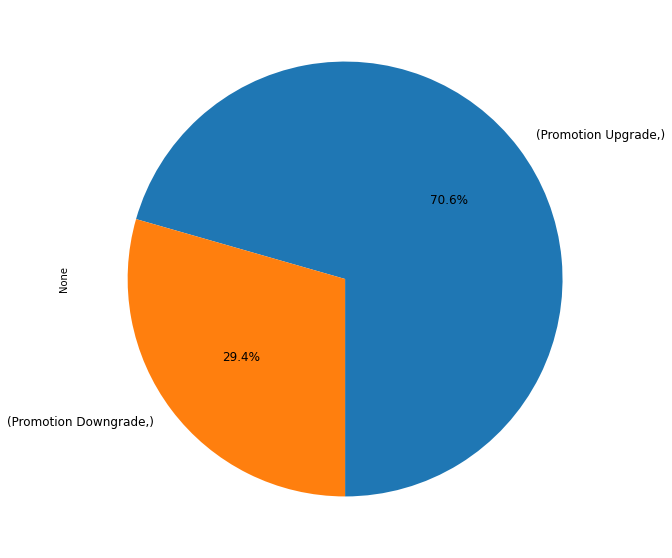

In [149]:
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)
usage_df[["Sub_Update_Status"]].value_counts().plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12)

## BB Extra GB Purchased

In [150]:
extra_GB_df.rename(columns={"Month_Subscribed":"BB_Extra_GB_Purchased_Month","Rental":"BB_Extra_GB_Rental","BB_Package":"EGB_BB_Package","GB_AMOUNT":"GB_Amount"}, inplace=True)

In [151]:
extra_GB_df["BB_Extra_GB_Usage_Times"] = 1

In [152]:
extra_GB_agg_df = extra_GB_df.groupby('ACCOUNT_NUM.hash', as_index=False).agg(list)

In [153]:
extra_GB_agg_df['BB_Extra_GB_Usage_Times'] = extra_GB_agg_df.apply(lambda x: len(x['BB_Extra_GB_Usage_Times']), axis=1)

In [154]:
def list_zipper(list1,list2):
    return dict(zip(list1,list2))

def total_rental(col):
    #col = literal_eval(col)
    new_val = 0
    try:
        for i in col:
            new_val = new_val + int(i)
    except:
        pass
    return new_val

In [155]:
extra_GB_agg_df['BB_Extra_GB_Month_vs_Rental'] = extra_GB_agg_df.apply(lambda x: list_zipper(x['BB_Extra_GB_Purchased_Month'],x['BB_Extra_GB_Rental']), axis=1)

In [156]:
extra_GB_agg_df.drop(["BB_Extra_GB_Purchased_Month"],axis=1, inplace=True)

In [157]:
extra_GB_agg_df["BB_Extra_GB_Rental"] = extra_GB_agg_df["BB_Extra_GB_Rental"].apply(lambda x: total_rental(x))
extra_GB_agg_df["GB_Amount"] = extra_GB_agg_df["GB_Amount"].apply(lambda x: total_rental(x))

In [158]:
extra_GB_agg_df["Hour_Subscribed"] = extra_GB_agg_df["Hour_Subscribed"].apply(lambda x: clean_lists(x))
extra_GB_agg_df["EGB_BB_Package"] = extra_GB_agg_df["EGB_BB_Package"].apply(lambda x: clean_lists(x))

In [159]:
extra_GB_agg_df["EGB_BB_Package"].astype("str").value_counts()

FTTH_WEB FAMILY PLUS                                                      3978
WEB LITE                                                                  3858
WEB FAMILY PLUS                                                           2337
LTE_WEB STARTER                                                           2215
WEB STARTER                                                               1904
                                                                          ... 
['WEB PAL', 'WEB FAMILY XTRA', 'WEB FAMILY ACTIVE', 'WEB FAMILY PLUS']       1
['FTTH_WEB FAMILY PLUS', 'FTTH_WEB FAMILY XTRA', 'FTTH_ANY BLAZE']           1
['FTTH_WEB FAMILY PLUS', 'WEB PAL', 'WEB FAMILY PLUS']                       1
['FTTH_WEB FAMILY PLUS', 'FTTH_ANY TIDE', 'FTTH_ANY SPIKE']                  1
['FTTH_WEB PRO', 'FTTH_WEB BOOSTER']                                         1
Name: EGB_BB_Package, Length: 509, dtype: int64

In [160]:
scaler = MinMaxScaler()
extra_GB_agg_df["BB_Extra_GB_Purchased_Scaled"] = scaler.fit_transform(extra_GB_agg_df["BB_Extra_GB_Rental"].values.reshape(-1,1))

In [161]:
extra_GB_agg_df["BB_Extra_GB_Purchased_Scaled"] = extra_GB_agg_df["BB_Extra_GB_Purchased_Scaled"].apply(lambda x: 0.01 if x==0.0 else x)

In [162]:
extra_GB_agg_df["BB_Extra_GB_Purchased_Scaled"].describe()

count    29374.000000
mean         0.007785
std          0.015151
min          0.000322
25%          0.001369
50%          0.003221
75%          0.008293
max          1.000000
Name: BB_Extra_GB_Purchased_Scaled, dtype: float64

In [163]:
# binning
bins = [0, 0.33, 0.66,1]
labels = ['LOW','MEDIUM','HIGH']
extra_GB_agg_df['BB_Extra_GB_Purchase_Categorical'] = pd.cut(extra_GB_agg_df['BB_Extra_GB_Purchased_Scaled'], bins=bins, labels=labels)

In [164]:
def get_night_hour(col):
    if not isinstance(col,float):
        if not isinstance(col, list):
            col = [col]
        night_time = 0
        for i in col:
            if i in range(0,8) or i >= 22:
                night_time += 0.2
        return night_time
    else:
        return 0
    
    
def get_day_hour(col):
    if not isinstance(col,float):
        if not isinstance(col, list):
            col = [col]
        day_time = 0
        for i in col:
            if i in range(9,22):
                day_time += 0.5
        return day_time
    else:
        return 0

In [165]:
extra_GB_agg_df["BB_Extra_GB_Subscribed_Night"] = extra_GB_agg_df["Hour_Subscribed"].apply(lambda x: get_night_hour(x))

In [166]:
extra_GB_agg_df["BB_Extra_GB_Subscribed_Day"] = extra_GB_agg_df["Hour_Subscribed"].apply(lambda x: get_day_hour(x))

In [167]:
# scaling usage rating
scaler = MinMaxScaler()
extra_GB_agg_df['BB_Extra_GB_Rental_Scaled'] = scaler.fit_transform(extra_GB_agg_df['BB_Extra_GB_Rental'].values.reshape(-1,1))

In [168]:
extra_GB_agg_df.rename(columns={"GB_Amount":"BB_Extra_GB_Amount","Hour_Subscribed": "BB_Extra_GB_Hour_Subscribed"}, inplace=True)

In [169]:
extra_GB_agg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29374 entries, 0 to 29373
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   ACCOUNT_NUM.hash                  29374 non-null  object  
 1   BB_Extra_GB_Rental                29374 non-null  int64   
 2   EGB_BB_Package                    29374 non-null  object  
 3   BB_Extra_GB_Amount                29374 non-null  int64   
 4   BB_Extra_GB_Hour_Subscribed       29374 non-null  object  
 5   BB_Extra_GB_Usage_Times           29374 non-null  int64   
 6   BB_Extra_GB_Month_vs_Rental       29374 non-null  object  
 7   BB_Extra_GB_Purchased_Scaled      29374 non-null  float64 
 8   BB_Extra_GB_Purchase_Categorical  29374 non-null  category
 9   BB_Extra_GB_Subscribed_Night      29374 non-null  float64 
 10  BB_Extra_GB_Subscribed_Day        29374 non-null  float64 
 11  BB_Extra_GB_Rental_Scaled         29374 non-null  floa

In [170]:
usage_df = usage_df.merge(extra_GB_agg_df,how='left', on='ACCOUNT_NUM.hash')

In [171]:
usage_df.BB_Package.fillna(usage_df.EGB_BB_Package,inplace=True)
usage_df.drop(["EGB_BB_Package"], axis=1, inplace=True)

## PeoTV Extra Channels Purchased

In [172]:
extra_Peo_df.rename(columns={"Month_Subscribed":"Peo_Extra_Channels_Purchased_Month","Rental":"Peo_Extra_Channels_Rental"}, inplace=True)

In [173]:
extra_Peo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151902 entries, 0 to 151901
Data columns (total 3 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   ACCOUNT_NUM.hash                    151902 non-null  object
 1   Peo_Extra_Channels_Purchased_Month  151902 non-null  object
 2   Peo_Extra_Channels_Rental           151902 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 3.5+ MB


In [174]:
len(extra_Peo_df["ACCOUNT_NUM.hash"].unique())

21847

In [175]:
extra_Peo_agg_df = extra_Peo_df.groupby('ACCOUNT_NUM.hash', as_index=False).agg(list)

In [176]:
extra_Peo_agg_df['Peo_Extra_Channels_Cumulative_Rental'] = extra_Peo_agg_df.apply(lambda x: sum(x['Peo_Extra_Channels_Rental']), axis=1)

In [177]:
extra_Peo_agg_df['Peo_Extra_Channels_Month_vs_Rental'] = extra_Peo_agg_df.apply(lambda x: list_zipper(x['Peo_Extra_Channels_Purchased_Month'],x['Peo_Extra_Channels_Rental']), axis=1)

In [178]:
extra_Peo_agg_df.drop(["Peo_Extra_Channels_Purchased_Month","Peo_Extra_Channels_Rental"],axis=1, inplace=True)

In [179]:
scaler = MinMaxScaler()
extra_Peo_agg_df["Peo_Extra_Channels_Purchased_Scaled"] = scaler.fit_transform(extra_Peo_agg_df["Peo_Extra_Channels_Cumulative_Rental"].values.reshape(-1,1))

In [180]:
extra_Peo_agg_df["Peo_Extra_Channels_Purchased_Scaled"] = extra_Peo_agg_df["Peo_Extra_Channels_Purchased_Scaled"].apply(lambda x: 0.01 if x==0.0 else x)

In [181]:
extra_Peo_agg_df["Peo_Extra_Channels_Purchased_Scaled"].describe()

count    21847.000000
mean         0.299167
std          0.163587
min          0.010000
25%          0.150000
50%          0.350000
75%          0.450000
max          1.000000
Name: Peo_Extra_Channels_Purchased_Scaled, dtype: float64

In [182]:
# binning
bins = [0, 0.33, 0.66,1]
labels = ['LOW','MEDIUM','HIGH']
extra_Peo_agg_df['Peo_Extra_Channels_Purchased_Categorical'] = pd.cut(extra_Peo_agg_df['Peo_Extra_Channels_Purchased_Scaled'], bins=bins, labels=labels)

In [183]:
extra_Peo_agg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21847 entries, 0 to 21846
Data columns (total 5 columns):
 #   Column                                    Non-Null Count  Dtype   
---  ------                                    --------------  -----   
 0   ACCOUNT_NUM.hash                          21847 non-null  object  
 1   Peo_Extra_Channels_Cumulative_Rental      21847 non-null  int64   
 2   Peo_Extra_Channels_Month_vs_Rental        21847 non-null  object  
 3   Peo_Extra_Channels_Purchased_Scaled       21847 non-null  float64 
 4   Peo_Extra_Channels_Purchased_Categorical  21847 non-null  category
dtypes: category(1), float64(1), int64(1), object(2)
memory usage: 704.3+ KB


In [184]:
usage_df = usage_df.merge(extra_Peo_agg_df,how='left', on='ACCOUNT_NUM.hash')

## Payment and Billing Info

In [185]:
for col in billing_df.columns[1:]:
    billing_df.rename(columns={col:"Bill_{}".format(col)},inplace=True)

In [186]:
len(billing_df["ACCOUNT_NUM.hash"].unique())

110888

In [187]:
only_accs_df = usage_df[["ACCOUNT_NUM.hash","Model"]]
only_accs_df["acc_num_new"] = only_accs_df["ACCOUNT_NUM.hash"]
only_accs_df.drop("Model",axis=1, inplace=True)

/var/folders/00/gmvdw06n48lgtsz126ng5y2m0000gn/T/ipykernel_11011/1610280062.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_accs_df["acc_num_new"] = only_accs_df["ACCOUNT_NUM.hash"]
/Users/chiranhewawitharana/mambaforge/envs/mactf/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [188]:
billing_reduced_df = billing_df.merge(only_accs_df,how='left', on='ACCOUNT_NUM.hash')
billing_reduced_df.drop_duplicates(["acc_num_new"],inplace=True)
billing_reduced_df.drop(["ACCOUNT_NUM.hash"],axis=1,inplace=True)
billing_reduced_df.rename(columns={"acc_num_new":"ACCOUNT_NUM.hash"},inplace=True)

In [189]:
billing_reduced_df.reset_index(inplace=True)
billing_reduced_df.drop("index", axis=1, inplace= True)

In [190]:
billing_reduced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81560 entries, 0 to 81559
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Bill_Balance_Froward      81560 non-null  int64 
 1   Bill_Net_Invoice          81560 non-null  int64 
 2   Bill_Tax_Invoice          81560 non-null  int64 
 3   Bill_Outstanding_Balance  81560 non-null  int64 
 4   Bill_Amount_Paid          81560 non-null  int64 
 5   Bill_Faild_to_Pay         81560 non-null  int64 
 6   Bill_Adjustment_Paid      81560 non-null  int64 
 7   Bill_Refunds_Paid         81560 non-null  int64 
 8   Bill_Payment_Due_Date     81560 non-null  object
 9   Bill_Bill_Settled_Date    69202 non-null  object
 10  Bill_Actual_Bill_Date     81560 non-null  object
 11  Bill_Billing_Status       81560 non-null  object
 12  ACCOUNT_NUM.hash          81559 non-null  object
dtypes: int64(8), object(5)
memory usage: 8.1+ MB


In [191]:
usage_df = usage_df.merge(billing_reduced_df,how='left', on='ACCOUNT_NUM.hash')

In [192]:
payments_df = payments_df.groupby('ACCOUNT_NUM.hash', as_index=False).agg(list)

In [193]:
payments_df['Payments_Month_vs_Amount_Paid'] = payments_df.apply(lambda x: list_zipper(x['Payment_Month'],x['Amount_Paid']), axis=1)
payments_df["Payment_Status"] = payments_df["Payment_Status"].apply(lambda x: clean_lists(x))
payments_df.drop(["Payment_Month","Amount_Paid"],axis=1, inplace=True)

In [194]:
payment_reduced_df = payments_df.merge(only_accs_df,how='left', on='ACCOUNT_NUM.hash')
payment_reduced_df.drop_duplicates(["acc_num_new"],inplace=True)
payment_reduced_df.drop(["ACCOUNT_NUM.hash"],axis=1,inplace=True)
payment_reduced_df.rename(columns={"acc_num_new":"ACCOUNT_NUM.hash"},inplace=True)

In [195]:
payment_reduced_df.reset_index(inplace=True)
payment_reduced_df.drop("index", axis=1, inplace= True)

In [196]:
payment_reduced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79691 entries, 0 to 79690
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Payment_Status                 79691 non-null  object
 1   Payments_Month_vs_Amount_Paid  79691 non-null  object
 2   ACCOUNT_NUM.hash               79690 non-null  object
dtypes: object(3)
memory usage: 1.8+ MB


In [197]:
usage_df = usage_df.merge(payment_reduced_df,how='left', on='ACCOUNT_NUM.hash')

### All Packages

In [203]:
package_df = package_df[["ACCOUNT_NUM.hash","Package_Formatted","FREE_or_PAID","is_Subscription","TARIFF_DESC","TARIFF_NAME"]]

In [204]:
package_df = package_df.groupby('ACCOUNT_NUM.hash', as_index=False).agg(list)

In [205]:
for col in package_df.columns[1:]:
    package_df[col] = package_df[col].apply(lambda x: clean_lists(x))

In [206]:
def package_set(col):
    for i in col:
        if i == "PAID" or i== "YES":
            return i
    return col

In [207]:
package_df["FREE_or_PAID"] = package_df["FREE_or_PAID"].apply(lambda x: package_set(x))
package_df["is_Subscription"] = package_df["is_Subscription"].apply(lambda x: package_set(x))

In [208]:
len(package_df["ACCOUNT_NUM.hash"].unique())

94764

In [209]:
packages_reduced_df = package_df.merge(only_accs_df,how='left', on='ACCOUNT_NUM.hash')
packages_reduced_df.drop_duplicates(["acc_num_new"],inplace=True)
packages_reduced_df.drop(["ACCOUNT_NUM.hash"],axis=1,inplace=True)
packages_reduced_df.rename(columns={"acc_num_new":"ACCOUNT_NUM.hash"},inplace=True)

In [210]:
packages_reduced_df.reset_index(inplace=True)
packages_reduced_df.drop("index", axis=1, inplace= True)

In [211]:
packages_reduced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81592 entries, 0 to 81591
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Package_Formatted  81592 non-null  object
 1   FREE_or_PAID       81592 non-null  object
 2   is_Subscription    81592 non-null  object
 3   TARIFF_DESC        81592 non-null  object
 4   TARIFF_NAME        81592 non-null  object
 5   ACCOUNT_NUM.hash   81591 non-null  object
dtypes: object(6)
memory usage: 3.7+ MB


In [212]:
usage_df = usage_df.merge(packages_reduced_df,how='left', on='ACCOUNT_NUM.hash')

In [213]:
usage_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159800 entries, 0 to 159799
Data columns (total 97 columns):
 #   Column                                    Non-Null Count   Dtype   
---  ------                                    --------------   -----   
 0   event_source.hash                         159800 non-null  object  
 1   ACCOUNT_NUM.hash                          159800 non-null  object  
 2   CR.hash                                   159800 non-null  object  
 3   Voice_INCOMING_Categorical                42724 non-null   object  
 4   Voice_INCOMING_Scaled                     42724 non-null   float64 
 5   Voice_INCOMING_Outlier                    42724 non-null   object  
 6   Location_Identifier                       97771 non-null   object  
 7   Location_Node                             97771 non-null   object  
 8   Package_Type_and_Medium                   97771 non-null   object  
 9   Model                                     97771 non-null   object  
 10  Service_

# Deriving Contextual Features

## Socio-Economic features

### Having an Insurance?

In [214]:
def having_insurance(vas):
    insurrence_VAS = ["Telehealth","Basic4 TeleLife","Plus4 TeleLife","Plus1 TeleLife","Basic1 TeleLife","Basic2 TeleLife"]
    if not isinstance(vas,float):
        for s in insurrence_VAS:
            if s in vas:
                return "YES"

In [215]:
usage_df["Having_Insurance"] = usage_df.apply(lambda x: having_insurance(x["Package_Formatted"]), axis=1)

### Household types
- Senior Citizen
  - Age > 55 years (demographics)
  - Peo_TV_Usage - High, Packages: PEO_RELIGIOUS_PACKAGE, PRANAMA
  - Voice call usage - high (in country, europian country, australia,US, canada)
  - Having Insurance: YES
- Kids at Home
  - Age > 30 years (assuming parents)
  - Peo TV Usage - High, packages: PEO_FAMILY, DOUBLEPROMO, PEO_TITANIUM, PEO_GOLD
  - Peo TV VAS: PeoTVGo_Channel Package (Extra Channels purchase)
  - BB Usage: Medium/ High
  - VAS - Sisu_Connect, Edu Lite
- Student (High school/University), Teenagers
  - Age < 27 (demographics)
  - Peo TV Usage - Medium/High packages: PEO_SILVER_PLUS, PEO_SILVER_PLUS_FTTH, PEO_ENTERTAINMENT, PEO_TITANIUM, DOUBLEPROMO, LEISURE_SPORTS
  - BB Usage - High **
  - Extra GB Purchase (High)
  - VAS - Meet Lite, Meet Max 
  - Peo TV VAS: E_Video_on_Demand
  - BB_VAS:  BB_YouTube Bundle, BB_ Entertainment Unlimited,  BB_Messenger Bundle
- Working Professional
  - Age > 22, < 55 (demographics)
  - Peo TV Usage - Medium/High packages: PEO_SILVER_PLUS, PEO_SILVER_PLUS_FTTH, PEO_FAMILY, SLT_STAFF_PEO_UNNATHAM_FTTH, SLT_STAFF_TRIPLE_PLAY, NEW_SLT_STAFF_PACKAGE, BOC
  - BB Usage - High **
  - Extra GB Purchase (all)
  - VAS - Meet Lite, Meet Max, AB_Service Vacation, AB_Referral offer Discount, AB_Citylink Loyalty Rewards
- Family Member Abroad
  - IDD Usage : High
  - IDD Calling Country : Europe/ UAE/ Australia/ Canada/ South and east Asia **
- Race: Tamil
   - Peo TV Usage - PEO_UNNATHAM, PEO_UTHAYAM, SLT_STAFF_PEO_UNNATHAM_FTTH
- Abroad person: country/ countries

## Adding Socio Feature Cols

In [216]:
def make_categorical(val):
    if val>=0.5:
        return "YES"

#### Having a Senior Citizen

In [217]:
def senior_citizen(age, peo_tv_cat, peo_tv_package, voice_call_cat, having_insurrance):
    prob = 0.0
    peo_packages = [ "PEO_RELIGIOUS_PACKAGE", "PRANAMA"]
    if age>= 55:
        prob += 0.3
    if peo_tv_cat == "HIGH":
        if not isinstance(peo_tv_package, float):
            for vas in peo_packages:
                if vas in peo_tv_package:
                    prob += 0.2
    if voice_call_cat == "MEDIUM":
        prob += 0.1
    if voice_call_cat == "HIGH":
        prob += 0.2
    if having_insurrance == "YES":
        prob += 0.5
    return prob

In [218]:
# test
senior_citizen(56,"HIGH",["PEO_RELIGIOUS_PACKAGE"],"MEDIUM",None)

0.6

In [219]:
usage_df["Having_Senior_Citizen_Scaled"] = usage_df.apply(lambda x: senior_citizen(x["AGE"],x["PEO_TV_Categorical"],x["Peo_TV_Package"],x["VOICE_Categorical"],x["Having_Insurance"]), axis=1)

In [220]:
usage_df["Having_Senior_Citizen"] = usage_df.apply(lambda x: make_categorical(x["Having_Senior_Citizen_Scaled"]), axis=1)

#### Having Kids at Home

In [221]:
def kids_at_home(age, peo_tv_cat, peo_tv_package,bb_usage,vas):
    prob = 0.0
    peo_packages = ["PEO_FAMILY", "DOUBLEPROMO", "PEO_TITANIUM", "PEO_GOLD","PEO_FAMILY"]
    peo_vas = ["PeoTVGo Channel Package"]
    all_vas = ["Sisu Connect", "Edu Lite"]
    if age>= 30:
        prob += 0.2
    if peo_tv_cat == "HIGH":
        prob += 0.25
        if not isinstance(peo_tv_package, float):
            for pack in peo_packages:
                if pack in peo_tv_package:
                    prob += 0.2
        if not isinstance(vas, float):
            for pack in peo_vas:
                if pack in vas:
                    prob += 0.2
    if not isinstance(vas, float):
        for pack in all_vas:
            if pack in vas:
                prob += 0.5
    if bb_usage == "MEDIUM" or bb_usage == "HIGH":
        prob += 0.1
    return prob

In [222]:
usage_df["Having_Kids_at_Home_Scaled"] = usage_df.apply(lambda x: kids_at_home(x["AGE"],x["PEO_TV_Categorical"],x["Peo_TV_Package"],x["BB_Categorical"],x["Package_Formatted"]), axis=1)

In [223]:
usage_df["Having_Kids_at_Home"] = usage_df.apply(lambda x: make_categorical(x["Having_Kids_at_Home_Scaled"]), axis=1)

#### Home Business/ SMEs

In [224]:
def smes(bb_cat,bb_package, extra_gb_cat, vas):
    prob = 0.0
    bb_packages=["4G Biz Pal","Any Glam","Any Storm","Any Spike","z Sales End_Office","Web Life",
                 "Web Inspire","Any Xtreme","Web Pro","Web Champ","Web Master"]
    all_vas = ["BB YouTube Bundle",'Meet Max',"BB Personal Storage"]
    if bb_cat == "MEDIUM":
        prob += 0.1
    if bb_cat == "HIGH":
        prob += 0.3
    if bb_cat == "HIGH":
        if not isinstance(bb_package, float):
            for pack in bb_packages:
                if pack in bb_package:
                    prob += 0.2
    if not isinstance(vas, float):
        for pack in all_vas:
            if pack in vas:
                prob += 0.2
    if extra_gb_cat == "LOW":
        prob +=0.1
    if extra_gb_cat == "MEDIUM" or extra_gb_cat == "HIGH":
        prob += 0.3
    return prob

In [225]:
usage_df["SMEs_Scaled"] = usage_df.apply(lambda x: smes(x["BB_Categorical"],x["BB_Package"],x["BB_Extra_GB_Purchase_Categorical"],x["Package_Formatted"]), axis=1)

In [226]:
usage_df["SMEs"] = usage_df.apply(lambda x: make_categorical(x["SMEs_Scaled"]), axis=1)

#### Teenagers and Students (age 16-26)

In [227]:
def teenage_students(age, peo_tv_cat, peo_tv_package,bb_cat, bb_package, extra_gb_cat, vas):
    prob = 0.0
    peo_packages = [ "PEO_TITANIUM", "LEISURE_SPORTS","PEO_ENTERTAINMENT"]
    bb_packages=["Student Package 1","Student Package 2","Any Flix","BB_Netflix Unlimited","Web Booster","Any Tide"]
    peo_vas = ["Video on Demand"]
    bb_vas = ["BB YouTube Bundle", "BB Entertainment Unlimited", "BB Messenger Bundle"]
    all_vas = ['Meet Lite', 'Meet Max']
    if age<= 26:
        prob += 0.3
    if peo_tv_cat == "MEDIUM":
        prob += 0.1
    if peo_tv_cat == "HIGH":
        prob += 0.2
    if peo_tv_cat == "MEDIUM" or peo_tv_cat == "HIGH":
        if not isinstance(peo_tv_package, float):
            for pack in peo_packages:
                if pack in peo_tv_package:
                    prob += 0.2
        if not isinstance(vas, float):
            for pack in peo_vas:
                if pack in vas:
                    prob += 0.2
    if bb_cat == "MEDIUM":
        prob += 0.1
    if bb_cat == "HIGH":
        prob += 0.3
    if bb_cat == "HIGH" or bb_cat == "MEDIUM":
        if not isinstance(vas, float):
            for pack in bb_vas:
                if pack in vas:
                    prob += 0.2
        if not isinstance(bb_package, float):
            for pack in bb_packages:
                if pack in bb_package:
                    prob += 0.2
    if not isinstance(vas, float):
        for pack in all_vas:
            if pack in vas:
                prob += 0.2
    if extra_gb_cat == "LOW":
        prob +=0.1
    if extra_gb_cat == "MEDIUM" or extra_gb_cat == "HIGH":
        prob += 0.3
    return prob

In [228]:
usage_df["Having_Teenagers_Students_Scaled"] = usage_df.apply(lambda x: teenage_students(x["AGE"],x["PEO_TV_Categorical"],x["Peo_TV_Package"],x["BB_Categorical"],x["BB_Package"],x["BB_Extra_GB_Purchase_Categorical"],x["Package_Formatted"]), axis=1)

In [229]:
usage_df["Having_Teenagers_Students"] = usage_df.apply(lambda x: make_categorical(x["Having_Teenagers_Students_Scaled"]), axis=1)

### Working Professionals

In [230]:
def working_professionals(age, peo_tv_cat, peo_tv_package, bb_cat, bb_package, extra_gb_cat, vas):
    prob = 0.0
    peo_packages = ["PEO_SILVER_PLUS", "PEO_FAMILY","PEO_SILVER_PLUS_FTTH", "SLT_STAFF_PEO_UNNATHAM_FTTH", "SLT_STAFF_TRIPLE_PLAY","NEW_SLT_STAFF_PACKAGE","BOC"]
    bb_packages= ["z Sales End_SLT Staff Home","Abhimaana","SLT Staff Web Family Plus","z Sales End_SLT Staff Home", 'Web Family Xtra']
    bb_vas = ["BB Personal Storage"]
    all_vas = ['Meet Lite', 'Meet Max','AB Referral offer Discount', 'AB Service Vacation','AB Citylink Loyalty Rewards']
    if age> 21 and age<56:
        prob += 0.2
    if peo_tv_cat == "MEDIUM":
        prob += 0.1
    if peo_tv_cat == "HIGH":
        prob += 0.1
    if peo_tv_cat == "MEDIUM" or peo_tv_cat == "HIGH":
        if not isinstance(peo_tv_package, float):
            for pack in peo_packages:
                if pack in peo_tv_package:
                    prob += 0.2
    if bb_cat == "MEDIUM":
        prob += 0.1
    if bb_cat == "HIGH":
        prob += 0.3
    if bb_cat == "HIGH" or bb_cat == "MEDIUM":
        if not isinstance(vas, float):
            for pack in bb_vas:
                if pack in vas:
                    prob += 0.2
        if not isinstance(bb_package, float):
            for pack in bb_packages:
                if pack in bb_package:
                    prob += 0.2
    if not isinstance(vas, float):
        for pack in all_vas:
            if pack in vas:
                prob += 0.25
    if extra_gb_cat == "LOW":
        prob +=0.1
    if extra_gb_cat == "MEDIUM" or extra_gb_cat == "HIGH":
        prob += 0.3
    return prob

In [231]:
usage_df["Having_Working_Professionals_Scaled"] = usage_df.apply(lambda x: working_professionals(x["AGE"],x["PEO_TV_Categorical"],x["Peo_TV_Package"],x["BB_Categorical"],x["BB_Package"],x["BB_Extra_GB_Purchase_Categorical"],x["Package_Formatted"]), axis=1)

In [232]:
usage_df["Having_Working_Professionals"] = usage_df.apply(lambda x: make_categorical(x["Having_Working_Professionals_Scaled"]), axis=1)

### Family Member Abroad

In [233]:
def family_member_abroad(idd_cat, incoming_country, outgoing_country):
    prob = 0.0
    countries = ["United Arab Emirates", "Australia - Mobile","UK - Mobile", "New Zealand", "Hong Kong","Maldive Islands","Singapore",
                 "India","Saudi Arabia - Mobile","Australia","China - Mobile","Maldive Islands",
                 "Israel - Mobile","Jordan - Mobile","U.K.","U.S.A","France","Italy - Mobile","Malaysia - Mobile","Bangladesh - Mobile"
                ,"Germany","Philippines - Mobile","Italy","Israel","Saudi Arabia","Pakistan - Mobile","Pakistan","Japan","Kuwait -Mobile"
                ,"Oman-Mobile ","France - Mobile","Canada","Japan - Mobile","United Arab Emirates  - Mobile","Bahrain - Mobile","Bahrain"
                ,"Cyprus - Mobile","Cyprus","Barbados","Korea Republic Of","Switzerland - Mobile","Indonesia - Mobile","Qatar - Mobile"
                ,"Qatar","Romania","Germany - Mobile","Belgium","Netherlands"]
    if idd_cat == "LOW":
        prob += 0.1
    if idd_cat == "MEDIUM":
        prob += 0.3
    if idd_cat == "HIGH":
        prob += 0.5
    if not isinstance(idd_cat, float):
        for country in countries:
            if not isinstance(incoming_country, float) and country in incoming_country:
                prob += 0.25
            elif not isinstance(outgoing_country, float) and country in outgoing_country:
                prob += 0.25
    return prob

In [234]:
usage_df["Having_Family_Member_Abroad_Scaled"] = usage_df.apply(lambda x: family_member_abroad(x["IDD_Overall_Categorical"],x["IDD_incoming_country"],x["IDD_outgoing_country"]), axis=1)

In [235]:
usage_df["Having_Family_Member_Abroad"] = usage_df.apply(lambda x: make_categorical(x["Having_Family_Member_Abroad_Scaled"]), axis=1)

### Race: Tamil

In [236]:
def tamil_check(peo_cat, peo_package):
    packages = ["PEO_UNNATHAM", "PEO_UTHAYAM", "SLT_STAFF_PEO_UNNATHAM_FTTH"]
    if not isinstance(peo_cat, float):
        for pack in packages:
            if not isinstance(peo_package, float) and pack in peo_package:
                return "YES"

In [237]:
usage_df["Tamil_Customer"] = usage_df.apply(lambda x: tamil_check(x["PEO_TV_Categorical"],x["Peo_TV_Package"]), axis=1)

## Adding Social feature derivable assumption cols

In [238]:
def senior_citizen_peo_packages(peo_tv_cat,peo_tv_package):
    prob = 0.0
    peo_packages = ["PEO_RELIGIOUS_PACKAGE", "PRANAMA"]
    if peo_tv_cat == "HIGH":
        if not isinstance(peo_tv_package, float):
            for vas in peo_packages:
                if vas in peo_tv_package:
                    prob += 0.2
    return prob

In [239]:
usage_df["Peo_Packages_if_Senior_Citizen"] = usage_df.apply(lambda x: senior_citizen_peo_packages(x["PEO_TV_Categorical"],x["Peo_TV_Package"]), axis=1)

In [240]:
def kids_peo_packages(peo_tv_cat,peo_tv_package):
    prob = 0.0
    peo_packages =  ["PEO_FAMILY", "DOUBLEPROMO", "PEO_TITANIUM", "PEO_GOLD","PEO_FAMILY"]
    if peo_tv_cat == "HIGH":
        if not isinstance(peo_tv_package, float):
            for vas in peo_packages:
                if vas in peo_tv_package:
                    prob += 0.2
    return prob

In [241]:
usage_df["Peo_Packages_if_Kids"] = usage_df.apply(lambda x: kids_peo_packages(x["PEO_TV_Categorical"],x["Peo_TV_Package"]), axis=1)

In [242]:
def teenager_student_peo_packages(peo_tv_cat,peo_tv_package):
    prob = 0.0
    peo_packages = ["DOUBLEPROMO", "PEO_TITANIUM", "LEISURE_SPORTS","PEO_ENTERTAINMENT"]
    if peo_tv_cat == "MEDIUM" or peo_tv_cat == "HIGH":
        if not isinstance(peo_tv_package, float):
            for vas in peo_packages:
                if vas in peo_tv_package:
                    prob += 0.2
    return prob

In [243]:
usage_df["Peo_Packages_if_Teenager_Students"] = usage_df.apply(lambda x: teenager_student_peo_packages(x["PEO_TV_Categorical"],x["Peo_TV_Package"]), axis=1)

In [244]:
def working_professional_peo_packages(peo_tv_cat,peo_tv_package):
    prob = 0.0
    peo_packages = ["PEO_SILVER_PLUS", "PEO_FAMILY","PEO_SILVER_PLUS_FTTH", "SLT_STAFF_PEO_UNNATHAM_FTTH", "SLT_STAFF_TRIPLE_PLAY","NEW_SLT_STAFF_PACKAGE","BOC"]
    if peo_tv_cat == "MEDIUM" or peo_tv_cat == "HIGH":
        if not isinstance(peo_tv_package, float):
            for vas in peo_packages:
                if vas in peo_tv_package:
                    prob += 0.2
    return prob

In [245]:
usage_df["Peo_Package_if_Working_Professionals"] = usage_df.apply(lambda x: working_professional_peo_packages(x["PEO_TV_Categorical"],x["Peo_TV_Package"]), axis=1)

In [246]:
def working_professional_bb_packages(bb_cat,bb_package):
    prob = 0.0
    bb_packages= ["z Sales End_SLT Staff Home","Abhimaana","SLT Staff Web Family Plus","z Sales End_SLT Staff Home", 'Web Family Xtra']
    if bb_cat == "MEDIUM" or bb_cat == "HIGH":
        if not isinstance(bb_package, float):
            for vas in bb_packages:
                if vas in bb_package:
                    prob += 0.2
    return prob

In [247]:
usage_df["BB_Package_if_Working_Professionals"] = usage_df.apply(lambda x: working_professional_bb_packages(x["BB_Categorical"],x["BB_Package"]), axis=1)

In [248]:
def teenager_student_bb_packages(bb_cat,bb_package):
    prob = 0.0
    bb_packages=["Student Package 1","Student Package 2","Any Flix","BB_Netflix Unlimited","Web Booster","Any Tide"]
    if bb_cat == "MEDIUM" or bb_cat == "HIGH":
        if not isinstance(bb_package, float):
            for vas in bb_packages:
                if vas in bb_package:
                    prob += 0.2
    return prob

In [249]:
usage_df["BB_Packages_if_Teenager_Students"] = usage_df.apply(lambda x: teenager_student_bb_packages(x["BB_Categorical"],x["BB_Package"]), axis=1)

In [250]:
def sme_bb_packages(bb_cat,bb_package):
    prob = 0.0
    bb_packages=["4G Biz Pal","Any Glam","Any Storm","Any Spike","z Sales End_Office","Web Life",
                 "Web Inspire","Any Xtreme","Web Pro","Web Champ","Web Master"]
    if bb_cat == "HIGH":
        if not isinstance(bb_package, float):
            for vas in bb_packages:
                if vas in bb_package:
                    prob += 0.2
    return prob

In [251]:
usage_df["BB_Packages_if_SMEss"] = usage_df.apply(lambda x: sme_bb_packages(x["BB_Categorical"],x["BB_Package"]), axis=1)

In [252]:
def kids_vas_packages(peo_cat,vas):
    prob = 0.0
    peo_vas = ["PeoTVGo Channel Package"]
    vas_packages = ["Sisu Connect", "Edu Lite"]
    if peo_cat == "HIGH":
        if not isinstance(vas, float):
            for s in peo_vas:
                if s in vas:
                    prob += 0.2
    if not isinstance(vas, float):
        for s in vas_packages:
            if s in vas:
                prob += 0.5
    return prob

In [253]:
usage_df["VAS_if_Kids"] = usage_df.apply(lambda x: kids_vas_packages(x["PEO_TV_Categorical"],x["VAS_Package"]), axis=1)

In [254]:
def teenager_student_vas_packages(peo_cat,bb_cat,vas):
    prob = 0.0
    peo_vas = ["Video on Demand"]
    bb_vas = ["BB YouTube Bundle", "BB Entertainment Unlimited", "BB Messenger Bundle"]
    vas_packages = ['Meet Lite', 'Meet Max']
    if peo_cat == "MEDIUM" or peo_cat == "HIGH":
        if not isinstance(vas, float):
            for v in peo_vas:
                if v in vas:
                    prob += 0.2
    if bb_cat == "MEDIUM" or bb_cat == "HIGH":
        if not isinstance(vas, float):
            for v in bb_vas:
                if v in vas:
                    prob += 0.2
    if not isinstance(vas, float):
        for v in vas_packages:
            if v in vas:
                prob += 0.3
    return prob

In [255]:
usage_df["VAS_if_Teenager_Students"] = usage_df.apply(lambda x: teenager_student_vas_packages(x["PEO_TV_Categorical"],x["BB_Categorical"],x["Package_Formatted"]), axis=1)

In [256]:
def working_professional_vas_packages(bb_cat,vas):
    prob = 0.0
    bb_vas = ["BB Personal Storage"]
    vas_packages = ['AB Referral offer Discount', 'AB Service Vacation',
                    'AB Citylink Loyalty Rewards','Meet Lite', 'Meet Max']
    if bb_cat == "MEDIUM" or bb_cat == "HIGH":
        if not isinstance(vas, float):
            for v in bb_vas:
                if v in vas:
                    prob += 0.2
    if not isinstance(vas, float):
        for v in vas_packages:
            if v in vas:
                prob += 0.25
    return prob

In [257]:
usage_df["VAS_if_Working_Professionals"] = usage_df.apply(lambda x: working_professional_vas_packages(x["BB_Categorical"],x["Package_Formatted"]), axis=1)

In [258]:
def family_member_abroad_idd_countries(idd_cat,incoming_country,outgoing_country):
    prob = 0.0
    countries = ["United Arab Emirates", "Australia - Mobile","UK - Mobile", "New Zealand", "Hong Kong","Maldive Islands","Singapore",
                 "India","Saudi Arabia - Mobile","Australia","China - Mobile","Maldive Islands",
                 "Israel - Mobile","Jordan - Mobile","U.K.","U.S.A","France","Italy - Mobile","Malaysia - Mobile","Bangladesh - Mobile"
                ,"Germany","Philippines - Mobile","Italy","Israel","Saudi Arabia","Pakistan - Mobile","Pakistan","Japan","Kuwait -Mobile"
                ,"Oman-Mobile ","France - Mobile","Canada","Japan - Mobile","United Arab Emirates  - Mobile","Bahrain - Mobile","Bahrain"
                ,"Cyprus - Mobile","Cyprus","Barbados","Korea Republic Of","Switzerland - Mobile","Indonesia - Mobile","Qatar - Mobile"
                ,"Qatar","Romania","Germany - Mobile","Belgium","Netherlands"]
    if not isinstance(idd_cat, float):
        if idd_cat == "MEDIUM" or idd_cat == "HIGH":
            for country in countries:
                if not isinstance(incoming_country, float) and country in incoming_country:
                    prob += 0.25
                elif not isinstance(outgoing_country, float) and country in outgoing_country:
                    prob += 0.25
    return prob

In [259]:
usage_df["IDD_if_Family_Member_Abroad"] = usage_df.apply(lambda x: family_member_abroad_idd_countries(x["IDD_Overall_Categorical"],x["IDD_incoming_country"],x["IDD_outgoing_country"]), axis=1)

In [260]:
usage_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159800 entries, 0 to 159799
Columns: 122 entries, event_source.hash to IDD_if_Family_Member_Abroad
dtypes: category(2), float64(50), object(70)
memory usage: 147.8+ MB


In [261]:
usage_df.to_csv("data/user_profile/prepared/User_Profile_Event_Source_Level.csv")

## Nul Handled User Profile

In [262]:
nh_usage_df = usage_df

In [263]:
usage_cols = ["Voice_OUTGOING_Scaled","Voice_INCOMING_Scaled"]

In [264]:
for col in usage_cols:
    nh_usage_df[col] = np.where(nh_usage_df["Sub_Type"].isnull() == False & nh_usage_df[col].isnull(), nh_usage_df[col].fillna(nh_usage_df[col].mean()), nh_usage_df[col])

In [265]:
nh_usage_df["PEO_TV_Scaled"] = np.where(nh_usage_df["PEO_TV_Scaled"].isnull() & ((nh_usage_df["Sub_Type"]=="DOUBLE_PLAY_PV") | (nh_usage_df["Sub_Type"]=="TRIPLE_PLAY")), nh_usage_df["PEO_TV_Scaled"].fillna(nh_usage_df["PEO_TV_Scaled"].mean()), nh_usage_df["PEO_TV_Scaled"])

In [266]:
nh_usage_df["BB_Scaled"] = np.where(nh_usage_df["BB_Scaled"].isnull() & ((nh_usage_df["Sub_Type"]=="DOUBLE_PLAY_BV") | (nh_usage_df["Sub_Type"]=="TRIPLE_PLAY")), nh_usage_df["BB_Scaled"].fillna(nh_usage_df["BB_Scaled"].mean()), nh_usage_df["BB_Scaled"])

### Handeling Object col null values

In [267]:
cat_cols = nh_usage_df.select_dtypes(include='object').columns
nh_usage_df[cat_cols] = nh_usage_df[cat_cols].fillna("NO_INFO")

### Filling Usage values with mean

In [268]:
mean_cols = ['BIRTH_YEAR','AGE']
for col in mean_cols:
    nh_usage_df[col] = nh_usage_df[col].fillna(nh_usage_df[col].mean())

### Filling Numerical cols with Zero

In [269]:
zero_cols = nh_usage_df.select_dtypes(include='float64').columns
nh_usage_df[zero_cols] = nh_usage_df[zero_cols].fillna(0)

### Fillling Cat Columns

In [270]:
nh_usage_df["BB_Extra_GB_Purchase_Categorical"] = nh_usage_df["BB_Extra_GB_Purchase_Categorical"].cat.add_categories("NO_INFO").fillna("NO_INFO")
nh_usage_df["Peo_Extra_Channels_Purchased_Categorical"] = nh_usage_df["Peo_Extra_Channels_Purchased_Categorical"].cat.add_categories("NO_INFO").fillna("NO_INFO")

In [271]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [272]:
nh_usage_df.isna().sum()

event_source.hash                           0
ACCOUNT_NUM.hash                            0
CR.hash                                     0
Voice_INCOMING_Categorical                  0
Voice_INCOMING_Scaled                       0
Voice_INCOMING_Outlier                      0
Location_Identifier                         0
Location_Node                               0
Package_Type_and_Medium                     0
Model                                       0
Service_Status                              0
Voice_OUTGOING_Categorical                  0
Voice_OUTGOING_Scaled                       0
Voice_OUTGOING_Outlier                      0
IDD_INCOMING_Categorical                    0
IDD_INCOMING_Scaled                         0
IDD_INCOMING_Outlier                        0
IDD_incoming_country                        0
IDD_OUTGOING_Categorical                    0
IDD_OUTGOING_Scaled                         0
IDD_OUTGOING_Outlier                        0
IDD_outgoing_country              

In [274]:
nh_usage_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159800 entries, 0 to 159799
Columns: 122 entries, event_source.hash to IDD_if_Family_Member_Abroad
dtypes: category(2), float64(50), object(70)
memory usage: 147.8+ MB


In [275]:
nh_usage_df.to_csv("data/user_profile/prepared/User_Profile_Event_Source_Level_Null_Handled.csv")

## ToDo - Deriving context
- Payment Patterns & information : Economical state/ payment type preferred/ payment state (good/bad/avarage)
- Time context - BB Usage Time/ PeoTV Watch Time/ Call Time/ IDD Call Time analysis
- Upgrade/ Downgrade purpose assumption

# User Profile -Analysis

### Subscription Changes

<AxesSubplot:ylabel='None'>

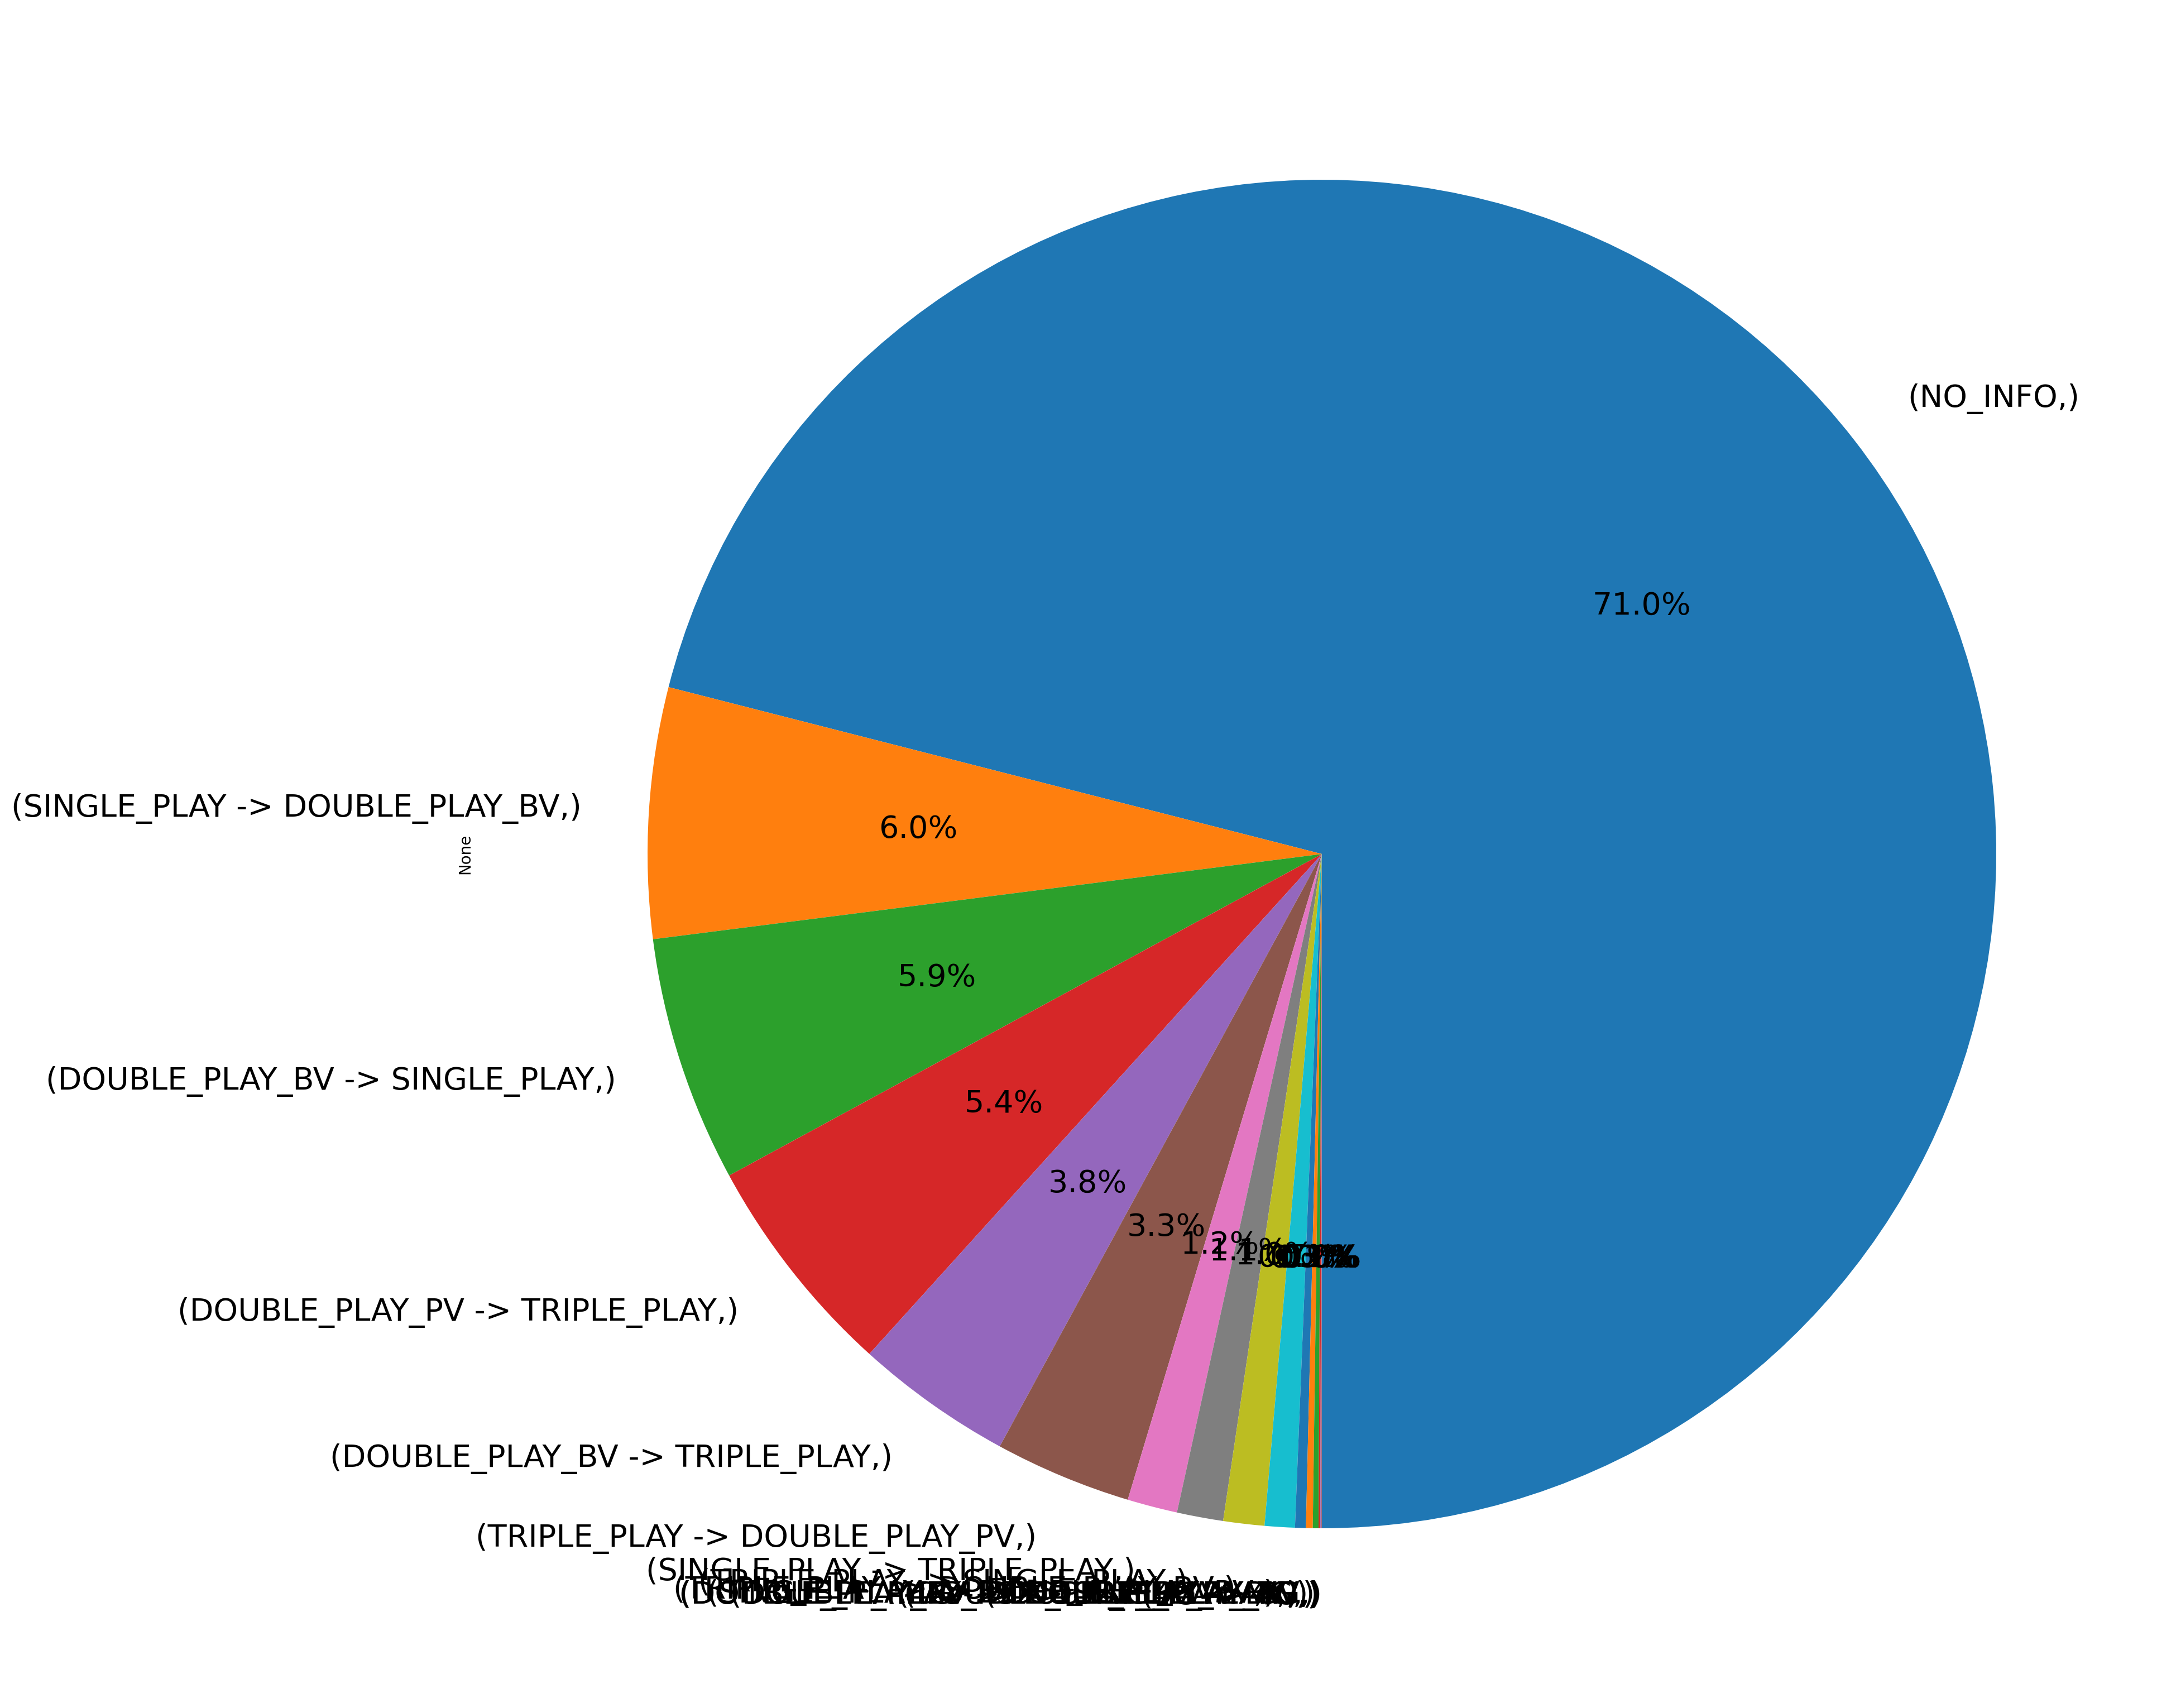

In [514]:
fig = plt.figure(figsize=(20,20), dpi=200)
ax = plt.subplot(111)

usage_df[["Sub_Update"]].value_counts().plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=270, fontsize=20)

### Customers with VAS

In [509]:
usage_df.apply(lambda x: "YES" if  type(x["Package_Formatted"]) != float else "NO", axis=1).value_counts()

YES    42594
dtype: int64

## Customers with Megaline Packages

In [510]:
usage_df.apply(lambda x: "YES" if  type(x["Megaline_Package"]) != float else "NO", axis=1).value_counts()

YES    42594
dtype: int64

## Customers with FTTH Package

In [511]:
usage_df.apply(lambda x: "YES" if  type(x["FTTH_Package"]) != float else "NO", axis=1).value_counts()

YES    42594
dtype: int64

### Customers with LTE packages

In [512]:
usage_df.apply(lambda x: "YES" if  type(x["LTE_Package"]) != float else "NO", axis=1).value_counts()

YES    42594
dtype: int64

## Customers with PeoTV Packages

In [513]:
peo_tv_users = usage_df.apply(lambda x: "YES" if  type(x["Peo_TV_Package"]) != float else "NO", axis=1)
peo_tv_users.value_counts()

YES    42594
dtype: int64